## Estimated oxygen variation Exploratory Data Analysis

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from utils import apply_scaling

from jmspack.NLTSA import (ts_levels, 
                           distribution_uniformity, 
                           fluctuation_intensity, 
                           complexity_resonance, 
                           complexity_resonance_diagram,
                          cumulative_complexity_peaks,
                          cumulative_complexity_peaks_plot)

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [2]:
session_info.show(write_req_file=False)

In [3]:
current_wd = os.getcwd()

In [4]:
os.chdir(current_wd + "/MyFitbitData/JamesTwose/")

In [5]:
o2_df = pd.DataFrame()
for file_name in glob.glob("Other/estimated*"):
    tmp = pd.read_csv(file_name)
    o2_df = pd.concat([o2_df, tmp])

In [6]:
df = (o2_df
 .assign(timestamp = lambda d: pd.to_datetime(d["timestamp"]).dt.round("15min"))
 .groupby("timestamp")
 .median()
)

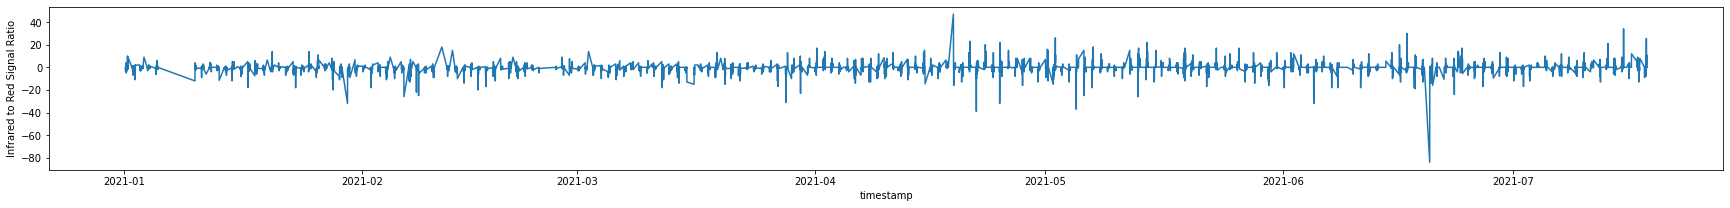

In [7]:
_ = plt.figure(figsize=(30, 3))
_ = sns.lineplot(data=df
     .reset_index(),
                     x="timestamp",
                     y="Infrared to Red Signal Ratio",
    )

In [10]:
os.chdir(current_wd)

In [9]:
df.head(2)

,Infrared to Red Signal Ratio
timestamp,
2021-01-01 03:30:00,-3.0
2021-01-01 03:45:00,0.0


## Raw data heatmap

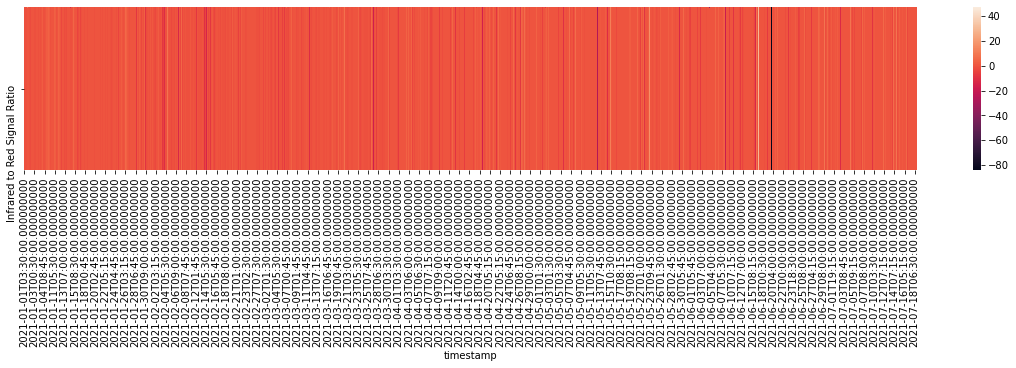

In [11]:
_ = plt.figure(figsize=(20, 3))
_ = sns.heatmap(data = df.T)

## Scaled data heatmap

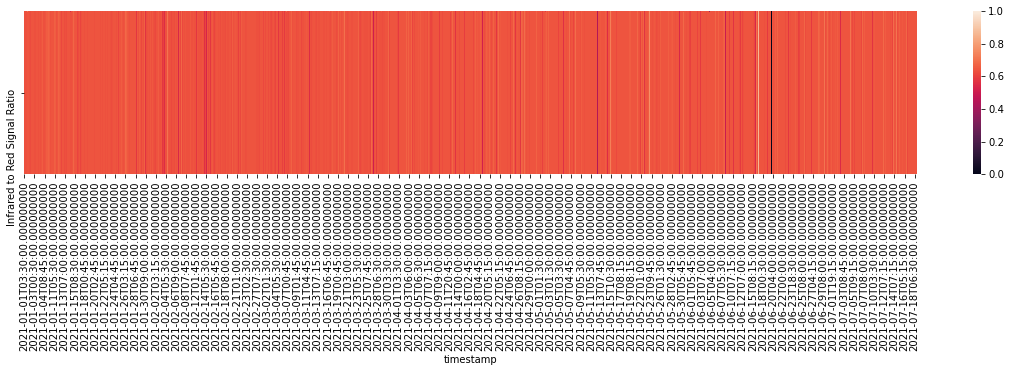

In [12]:
_ = plt.figure(figsize=(20, 3))
_ = sns.heatmap(df
                .pipe(apply_scaling)
                .T
               )

In [13]:
fi_df = fluctuation_intensity(df=df.pipe(apply_scaling), 
                      win=7, 
                      xmin=0, 
                      xmax=1, 
                      col_first=1, 
                      col_last=df.shape[1])

In [14]:
du_df = distribution_uniformity(df=df.pipe(apply_scaling), 
                      win=7, 
                      xmin=0, 
                      xmax=1, 
                      col_first=1, 
                      col_last=df.shape[1])

In [15]:
cr_df = complexity_resonance(fi_df, du_df)

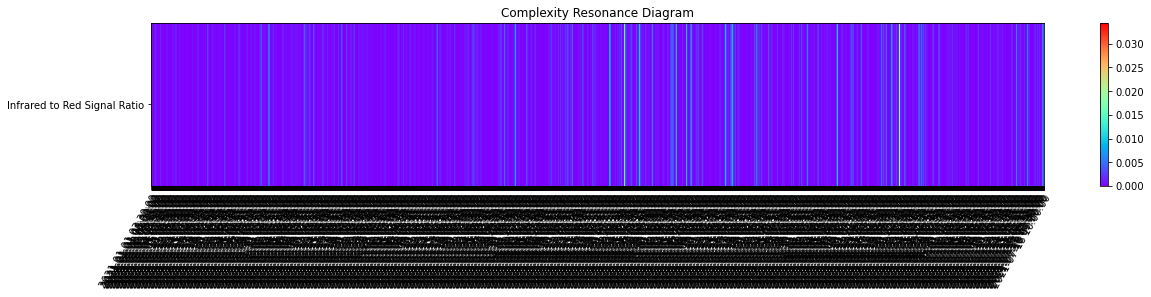

In [16]:
_ = complexity_resonance_diagram(cr_df, figsize=(20, 3))

In [17]:
cumulative_complexity_peaks_df, significant_peaks_df = cumulative_complexity_peaks(df = cr_df,
                            significant_level_item = 0.05,
                            significant_level_time = 0.05)

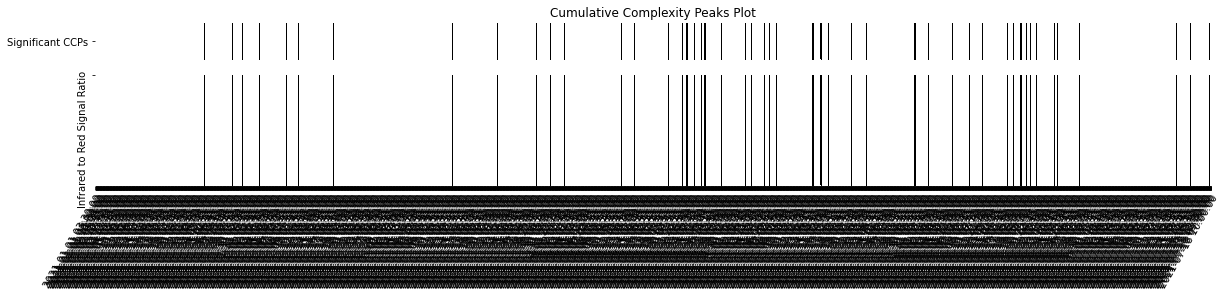

In [18]:
_ = cumulative_complexity_peaks_plot(cumulative_complexity_peaks_df=cumulative_complexity_peaks_df, 
                                     significant_peaks_df=significant_peaks_df,
                                     figsize=(20, 3))

## Dates of interest

In [19]:
significant_peaks_df[significant_peaks_df["Significant CCPs"]==1]

,Significant CCPs
2021-01-17 04:00:00,1.0
2021-01-20 07:45:00,1.0
2021-01-23 08:00:00,1.0
2021-01-28 04:30:00,1.0
2021-01-28 04:45:00,1.0
...,...
2021-07-18 08:15:00,1.0
2021-07-18 08:30:00,1.0
2021-07-18 08:45:00,1.0
2021-07-18 09:00:00,1.0


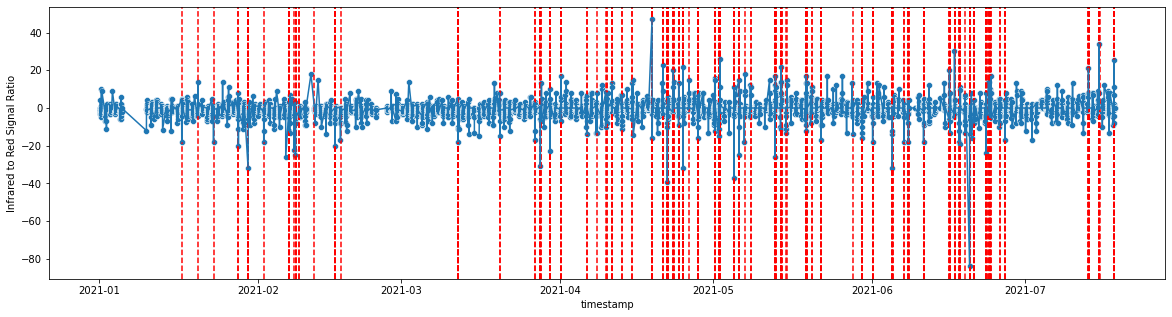

In [24]:
for col in df.columns.tolist():
    _ = plt.figure(figsize=(20, 5))
    for date in significant_peaks_df[significant_peaks_df["Significant CCPs"]==1].index.tolist():
        _ = plt.axvline(date, c="red", ls="--")
    _ = sns.lineplot(data=df
     .reset_index(),
                     x="timestamp",
                     y=col,
    )
    _ = sns.scatterplot(data=df
     .reset_index(),
                     x="timestamp",
                     y=col,
    )